In [1]:
!pip install simpy

In [2]:
import pandas as pd

roomba_data = [
    ["A", 1.0, 2.5],
    ["B", 0.5, 1.5],
    ["C", 0.8, 2.0],
    ["D", 1.4, 3.5],
    ["E", 0.5, 1.2],
    ["F", 1.0, 3.0],
]

roomba_df = pd.DataFrame(roomba_data, columns=["id", "charge_time", "clean_time"])
roomba_df

,id,charge_time,clean_time
0,A,1.0,2.5
1,B,0.5,1.5
2,C,0.8,2.0
3,D,1.4,3.5
4,E,0.5,1.2
5,F,1.0,3.0


In [3]:
import simpy 
import pandas as pd

# create an empty data log
data_log = []

# The Roomba model isa Python generator. The id, charge_time, and clean_time
# parameters are the information needed to specify a particular instance of a Roomba.
# The model will log the begin and end of each charge and clean cycle.

def roomba(id, charge_time, clean_time):
    while True:
        # cleaning phase
        tic = env.now
        yield env.timeout(clean_time)
        toc = env.now
        data_log.append([id, "cleaning", tic, toc])
   
        # charging phase
        tic = env.now
        yield env.timeout(charge_time)
        toc = env.now
        data_log.append([id, "charging", tic, toc])

# create the simulation environment
env = simpy.Environment()

# create the processes being simuulated
env.process(roomba("A", 1.0, 2.5))

# run the simulation
env.run(until=16)

print(data_log)

[['A', 'cleaning', 0, 2.5], ['A', 'charging', 2.5, 3.5], ['A', 'cleaning', 3.5, 6.0], ['A', 'charging', 6.0, 7.0], ['A', 'cleaning', 7.0, 9.5], ['A', 'charging', 9.5, 10.5], ['A', 'cleaning', 10.5, 13.0], ['A', 'charging', 13.0, 14.0]]


In [4]:
df = pd.DataFrame(data_log, columns=["id", "activity", "begin", "end"])
df["time"] = df["end"] - df["begin"]
display(df)

,id,activity,begin,end,time
0,A,cleaning,0.0,2.5,2.5
1,A,charging,2.5,3.5,1.0
2,A,cleaning,3.5,6.0,2.5
3,A,charging,6.0,7.0,1.0
4,A,cleaning,7.0,9.5,2.5
5,A,charging,9.5,10.5,1.0
6,A,cleaning,10.5,13.0,2.5
7,A,charging,13.0,14.0,1.0


In [5]:
pd.pivot_table(df, index=["activity"], aggfunc={"time":sum} )

,time
activity,
charging,4.0
cleaning,10.0


In [6]:
import simpy 
import pandas as pd

# create an empty data log
data_log = []

# The Roomba model isa Python generator. The id, charge_time, and clean_time
# parameters are the information needed to specify a particular instance of a Roomba.
# The model will log the begin and end of each charge and clean cycle.

def roomba(id, charge_time, clean_time):
    while True:
        # cleaning phase
        tic = env.now
        yield env.timeout(clean_time)
        toc = env.now
        data_log.append([id, "cleaning", tic, toc])
   
        # charging phase
        tic = env.now
        yield env.timeout(charge_time)
        toc = env.now
        data_log.append([id, "charging", tic, toc])

# create the simulation environment
env = simpy.Environment()

for r in roomba_df.index:
    env.process(roomba(roomba_df["id"][r], roomba_df["charge_time"][r], roomba_df["clean_time"][r]))

# run the simulation
env.run(until=16)

df = pd.DataFrame(data_log, columns=["id", "activity", "begin", "end"])
df["time"] = df["end"] - df["begin"]
display(df)

,id,activity,begin,end,time
0,E,cleaning,0.0,1.2,1.2
1,B,cleaning,0.0,1.5,1.5
2,E,charging,1.2,1.7,0.5
3,C,cleaning,0.0,2.0,2.0
4,B,charging,1.5,2.0,0.5
...,...,...,...,...,...
59,D,charging,13.3,14.7,1.4
60,E,cleaning,13.6,14.8,1.2
61,F,cleaning,12.0,15.0,3.0
62,E,charging,14.8,15.3,0.5


In [7]:
df["time"] = df["end"] - df["begin"]
pd.pivot_table(df, index=["activity"], aggfunc={"time":sum} )

,time
activity,
charging,23.2
cleaning,65.3


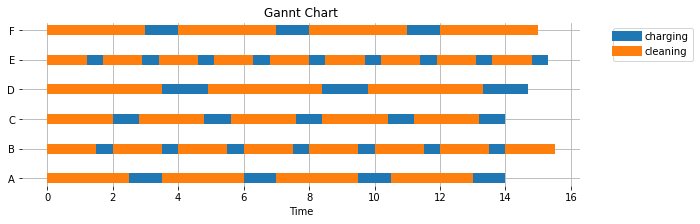

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def gantt(df, lw=10):
    
    # create sorted lists of the unique ids and activities appearing in the data log
    ids = sorted(list(set(df["id"])))
    activities = sorted(list(set(df["activity"])))
    
    # create list of unique colors for each event
    colors = [f"C{i}" for i in range(len(activities))]
    
    # create plot window
    fig, ax = plt.subplots(1, 1, figsize=(10, 3))
    
    # for each event and id, find entries in the data log and plot the begin and end points
    for i, activity in enumerate(activities):
        for j, id in enumerate(ids):  
            for k in df[(df["id"]==id) & (df["activity"]==activity)].index:
                ax.plot([df["begin"][k], df["end"][k]], [j, j], colors[i], solid_capstyle="butt", lw=lw)
                
    # create legend
    lines = [Line2D([0], [0], lw=lw, color=colors[i]) for i in range(len(activities))]
    ax.legend(lines, activities, bbox_to_anchor=(1.05, 1.0), loc="upper left")
    
    # annotate the axes
    ax.set_yticks(range(len(ids)))
    ax.set_yticklabels(ids)
    ax.grid(True)
    ax.set_xlabel("Time")
    ax.set_title("Gannt Chart")
    for sp in ['top', 'bottom', 'right', 'left']:
        ax.spines[sp].set_visible(False)
        
gantt(df)

          time
activity      
charging  14.7
cleaning  43.5


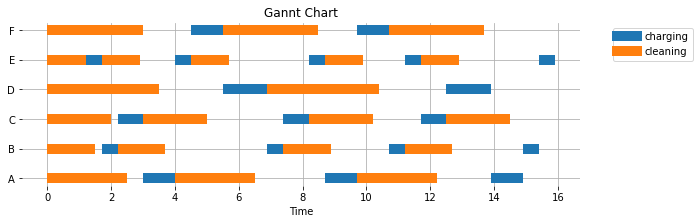

In [9]:
import simpy 
import pandas as pd

data_log = []

def roomba_model(id, charge_time, clean_time):
    while True:
        tic = env.now
        yield env.timeout(clean_time)
        toc = env.now
        data_log.append([id, "cleaning", tic, toc])
        
        request = chargers.request()
        yield request
        tic = env.now
        yield env.timeout(charge_time)
        chargers.release(request)
        toc = env.now
        data_log.append([id, "charging", tic, toc])
   
env = simpy.Environment()
chargers = simpy.Resource(env, capacity=1)

for r in roomba_df.index:
    env.process(roomba_model(roomba_df["id"][r], roomba_df["charge_time"][r], roomba_df["clean_time"][r]))

env.run(until=16)

df = pd.DataFrame(data_log, columns=["id", "activity", "begin", "end"])
df["time"] = df["end"] - df["begin"]
pivot_table = pd.pivot_table(df, index=["activity"], aggfunc={"time":sum} )

print(pivot_table)
gantt(df)

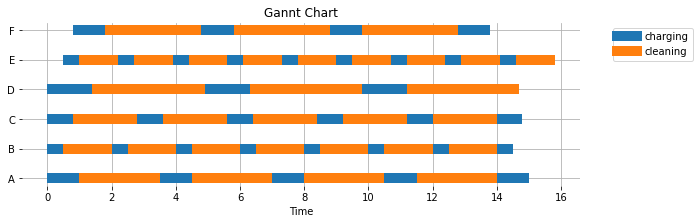

In [10]:
import simpy 
import pandas as pd
import numpy as np

data_log = []

def roomba_model(id, charge_time, clean_time):
    while True:
        with chargers.request() as request:
            yield request
            tic = env.now
            yield env.timeout(charge_time)
            toc = env.now
            data_log.append([id, "charging", tic, toc])
            
        tic = env.now
        yield env.timeout(clean_time)
        toc = env.now
        data_log.append([id, "cleaning", tic, toc])
        
env = simpy.Environment()
chargers = simpy.Resource(env, capacity=4)

for r in roomba_df.index:
    env.process(roomba_model(roomba_df["id"][r], roomba_df["charge_time"][r], roomba_df["clean_time"][r]))

env.run(until=16)
df = pd.DataFrame(data_log, columns=["id", "activity", "begin", "end"])

df["time"] = df["end"] - df["begin"]
pd.pivot_table(df, index=["activity"], aggfunc={"time":sum} )

gantt(df)

          time
activity      
charging  22.7
cleaning  62.6


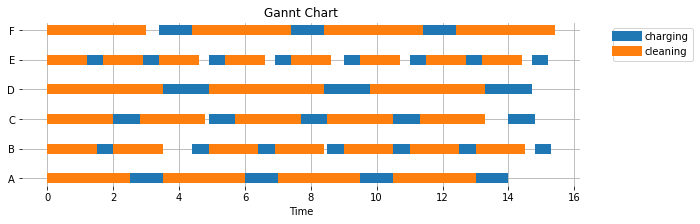

In [11]:
import simpy 
import pandas as pd
import numpy as np

data_log = []

def roomba_model(id, charge_time, clean_time):
    while True:
        tic = env.now
        yield env.timeout(clean_time)
        toc = env.now
        data_log.append([id, "cleaning", tic, toc])
        
        with chargers.request() as request:
            yield request
            tic = env.now
            yield env.timeout(charge_time)
            toc = env.now
            data_log.append([id, "charging", tic, toc])
            
reporter_log = []
def reporter(dt):
    while True:
        reporter_log.append([env.now, chargers.count])
        yield env.timeout(dt)
        
env = simpy.Environment()
chargers = simpy.Resource(env, capacity=2)

for r in roomba_df.index:
    env.process(roomba_model(roomba_df["id"][r], roomba_df["charge_time"][r], roomba_df["clean_time"][r]))
    
env.process(reporter(0.1))

env.run(until=16)
df = pd.DataFrame(data_log, columns=["id", "activity", "begin", "end"])

df["time"] = df["end"] - df["begin"]
print(pd.pivot_table(df, index=["activity"], aggfunc={"time":sum}))

gantt(df)

(array([17.,  0.,  0., 54.,  0., 90.]),
 array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
        1.66666667, 2.        ]),
 <BarContainer object of 6 artists>)

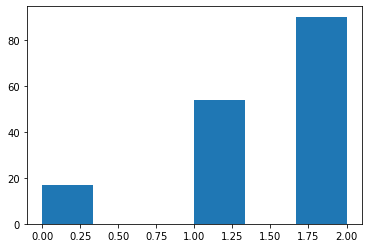

In [12]:
data = np.array(reporter_log)
plt.hist(data[:,1], 6)